# Advanced Reinforcement Learning in Python: Rainbow DQN

In [100]:
!apt-get install xvfb \
  build-essential \
  zlib1g-dev libsdl2-dev \
  libjpeg-dev \
  nasm \
  tar \
  libbz2-dev \
  libgtk2.0-dev \
  cmake \
  git \
  libfluidsynth-dev \
  libgme-dev \
  libopenal-dev \
  timidity \
  libwildmidi-dev \
  unzip \
  libboost-all-dev \
  liblua5.1-dev

!pip install gym==0.23 gym[box2d] pyvirtualdisplay gym-super-mario-bros vizdoom

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'liblua5.1-0-dev' instead of 'liblua5.1-dev'
build-essential is already the newest version (12.4ubuntu1).
libgtk2.0-dev is already the newest version (2.24.32-1ubuntu1).
libjpeg-dev is already the newest version (8c-2ubuntu8).
zlib1g-dev is already the newest version (1:1.2.11.dfsg-0ubuntu2).
libboost-all-dev is already the newest version (1.65.1.0ubuntu1).
libfluidsynth-dev is already the newest version (1.1.9-1).
libgme-dev is already the newest version (0.6.2-1).
liblua5.1-0-dev is already the newest version (5.1.5-8.1build2).
libopenal-dev is already the newest version (1:1.18.2-2).
libwildmidi-dev is already the newest version (0.4.2-1).
nasm is already the newest version (2.13.02-0.1).
timidity is already the newest version (2.13.2-41).
cmake is already the newest version (3.10.2-1ubuntu2.18.04.2).
git is already the newest version (1:2.17.1-1ubuntu0.9).
libbz2-dev is a

In [1]:
import gym
from base64 import b64encode
from IPython.display import HTML
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from vizdoom import *

In [2]:
from pyvirtualdisplay import Display
Display(visible=False, size=(1400, 900)).start()

In [3]:
def display_video(frames, framerate=30):
  height, width, _ = frames[0].shape
  dpi = 70
  orig_backend = matplotlib.get_backend()
  matplotlib.use('Agg')
  fig, ax = plt.subplots(1, 1, figsize=(width / dpi, height / dpi), dpi=dpi)
  matplotlib.use(orig_backend)
  ax.set_axis_off()
  ax.set_aspect('equal')
  ax.set_position([0, 0, 1, 1])
  im = ax.imshow(frames[0])
  def update(frame):
    im.set_data(frame)
    return [im]
  interval = 1000/framerate
  anim = animation.FuncAnimation(fig=fig, func=update, frames=frames,
                                  interval=interval, blit=True, repeat=False)
  return HTML(anim.to_html5_video())

def test_environment(env):
  frames = []
  env.reset()
  done = False
  while not done:
    frame = env.render(mode='rgb_array')
    frames.append(frame)
    _, _, done, _ = env.step(env.action_space.sample())
  return frames

### Lunar Lander

In [104]:
env = gym.make('LunarLander-v2')
frames = test_environment(env)
display_video(frames)

In [105]:
print(f"""
  Observation dimensions: {env.observation_space.shape}.
  Sample observation: {env.observation_space.sample()}.
  Actions: {env.action_space.n}.
""")


  Observation dimensions: (8,).
  Sample observation: [-0.01217072  0.25563088  1.4098121  -0.5550028   1.1142071   1.6946834
  0.49206826 -2.1834614 ].
  Actions: 4.



### Doom

In [5]:
from vizdoom import *
import time
import random

game = DoomGame()
game.load_config("vizdoom/scenarios/basic.cfg")
game.init()

shoot = [0, 0, 1]
left = [1, 0, 0]
right = [0, 1, 0]
actions = [shoot, left, right]

game.new_episode()
while not game.is_episode_finished():
    state = game.get_state()
    img = state.screen_buffer
    misc = state.game_variables
    reward = game.make_action(random.choice(actions))
print("Result:", game.get_total_reward())

FileDoesNotExistException: ignored

### Super Mario Bros.

In [53]:
from nes_py.wrappers import JoypadSpace
import gym_super_mario_bros
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [54]:
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)
frames = test_environment(env)

In [55]:
display_video(frames[::10])

In [97]:
for i in range(1000):
  a = env.step(env.action_space.sample())

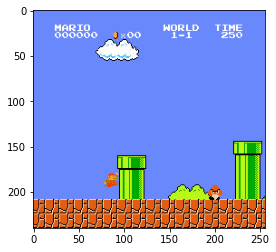

In [98]:
plt.imshow(env.render(mode='rgb_array'))

In [ ]:
!apt-get install -y \
    libgl1-mesa-dev \
    libgl1-mesa-glx \
    libglew-dev \
    xvfb \
    libosmesa6-dev \
    software-properties-common \
    patchelf

!pip install \
    free-mujoco-py \
    gym==0.21 \
    gym[box2d] \
    pytorch-lightning==1.5.8 \
    optuna \
    pyvirtualdisplay \
    PyOpenGL \
    PyOpenGL-accelerate

In [ ]:
from pyvirtualdisplay import Display
Display(visible=False, size=(1400, 900)).start()

In [ ]:
import gym

from base64 import b64encode
from IPython.display import HTML
from gym.wrappers import RecordVideo, RecordEpisodeStatistics, FlattenObservation, FilterObservation

In [ ]:
for env in gym.envs.registry.all():
  print(env.id)

#### Create a function to visualize our environments

In [ ]:
def display_video(episode=0):
  video_file = open(f'/content/videos/rl-video-episode-{episode}.mp4', "r+b").read()
  video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
  return HTML(f"<video width=600 controls><source src='{video_url}'></video>")

def test_environment(env):
  env.reset()
  done = False
  while not done:
    _, _, done, _ = env.step(env.action_space.sample())
  # env.close()
  return display_video()


def create_environment(name):
  env = gym.make(name)
  env = RecordVideo(env, video_folder='./videos', episode_trigger=lambda x: x % 50 == 0)
  env = RecordEpisodeStatistics(env)
  return env

## Introduction to the tasks in this course

#### Lunar lander

In [ ]:
env = create_environment('LunarLander-v2')
test_environment(env)

In [ ]:
print(f"""
  Observation dimensions: {env.observation_space.shape}.
  Sample observation: {env.observation_space.sample()}.
  Actions: {env.action_space.n}.
""")

#### Robotic arm: Pick and place the block

In [ ]:
env = create_environment('FetchPickAndPlaceDense-v1')
test_environment(env)

In [ ]:
sample_observation = env.observation_space.sample()

print("Sample observation:")
for key in sample_observation:
  print(key, sample_observation[key])

print("Sample action")
print(env.action_space.sample())

#### Robotic arm: Push the block to the target

In [ ]:
env = create_environment('FetchPushDense-v1')
test_environment(env)

In [ ]:
sample_observation = env.observation_space.sample()

print("Sample observation:")
for key in sample_observation:
  print(key, sample_observation[key])

print("Sample action")
print(env.action_space.sample())

#### Shadow hand: Manipulate block

In [ ]:
env = create_environment('HandManipulateBlockRotateXYZTouchSensorsDense-v1')
test_environment(env)

In [ ]:
sample_observation = env.observation_space.sample()

print("Sample observation:")
for key in sample_observation:
  print(key, sample_observation[key])

print("Sample action")
print(env.action_space.sample())

#### Shadow hand: Manipulate egg

In [ ]:
env = create_environment('HandManipulateEggFullDense-v0')
test_environment(env)

In [ ]:
sample_observation = env.observation_space.sample()

print("Sample observation:")
for key in sample_observation:
  print(key, sample_observation[key])

print("Sample action")
print(env.action_space.sample())

#### Shadow hand: Manipulate pen

In [ ]:
env = create_environment('HandManipulatePenRotateDense-v0')
test_environment(env)

In [ ]:
sample_observation = env.observation_space.sample()

print("Sample observation:")
for key in sample_observation:
  print(key, sample_observation[key])

print("Sample action")
print(env.action_space.sample())

#### Shadow hand: Manipulate block

In [ ]:
env = create_environment('HandManipulateBlockRotateXYZTouchSensors-v1')
test_environment(env)

In [ ]:
sample_observation = env.observation_space.sample()

print("Sample observation:")
for key in sample_observation:
  print(key, sample_observation[key])

print("Sample action")
print(env.action_space.sample())